# Data visualisation lab 3
## Made by: Paulius Lapienis

In [1]:
from labs.definitions import DATA_DIR
import pandas as pd

DATA_PATH = DATA_DIR / "anime_filtered.csv"
df = pd.read_csv(DATA_PATH)
df

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14469,26089,Gutchonpa Omoshiro Hanashi,NaN,グッチョンパおもしろ話,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Unknown,5,Finished Airing,...,NaN,Fall 1987,Unknown,"{'Other': [{'mal_id': 26087, 'type': 'anime', ...",NaN,NaN,NaN,Kids,[],[]
14470,21525,Geba Geba Shou Time!,NaN,ゲバゲバ笑タイム!,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,1,Finished Airing,...,NaN,NaN,NaN,[],Studio Lotus,NaN,NaN,Comedy,[],[]
14471,37897,Godzilla: Hoshi wo Kuu Mono,NaN,GODZILLA -星を喰う者-,"Godzilla Part 3, Godzilla: Eater of Stars",https://myanimelist.cdn-dena.com/images/anime/...,Movie,Other,1,Not yet aired,...,NaN,NaN,NaN,"{'Prequel': [{'mal_id': 36816, 'type': 'anime'...",NaN,NaN,NaN,"Action, Sci-Fi, Adventure, Fantasy",[],[]
14472,34193,Nippon Mukashibanashi: Sannen Netarou,NaN,日本昔ばなし 三ねん寝太郎,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,1,Finished Airing,...,NaN,NaN,NaN,[],NaN,NaN,NaN,"Fantasy, Kids",[],[]


In [15]:
df.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme'],
      dtype='object')

In [16]:
df.describe()

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites
count,14474.000000,14474.000000,14474.000000,1.447400e+04,12901.000000,14474.000000,1.447400e+04,14474.000000
mean,17371.948183,11.310971,6.144179,1.146319e+04,6439.625068,7220.277256,2.297275e+04,311.735595
std,13163.266015,43.449161,1.460617,4.311072e+04,3719.462602,4168.959000,7.499075e+04,2615.910510
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,4387.500000,1.000000,5.550000,4.600000e+01,3218.000000,3613.250000,2.450000e+02,0.000000
50%,15128.000000,1.000000,6.370000,5.010000e+02,6442.000000,7225.500000,1.682500e+03,2.000000
75%,31142.000000,12.000000,7.060000,3.947250e+03,9664.000000,10826.750000,1.038050e+04,23.000000
max,37916.000000,1818.000000,10.000000,1.009477e+06,12919.000000,14487.000000,1.456378e+06,106895.000000


Bad visualization no. 1: Too many genres in one graph.

<Axes: title={'center': 'Most popular genres by members count'}, ylabel='genre'>

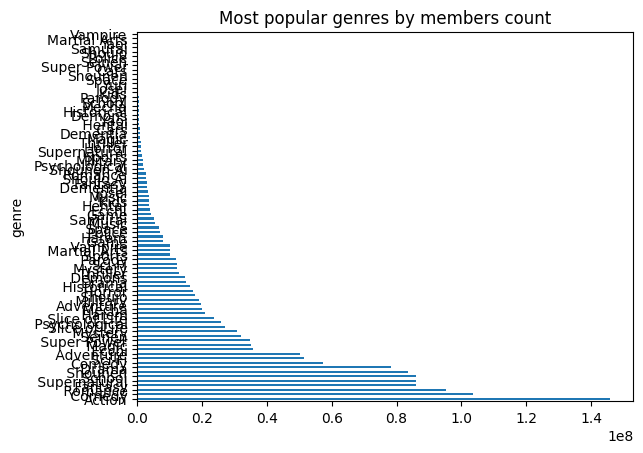

In [2]:
import numpy as np

(
    df[["members", "genre"]]
    .dropna()
    .assign(genre=df["genre"].str.split(","))
    .explode(["genre"])
    .groupby("genre")
    .agg([np.sum])
    .sort_values(by=("members", "sum"), ascending=False)
    .plot(
        kind="barh",
        y="members",
        legend=False,
        title="Most popular genres by members count",
    )
)

To make it better only show the top or the botton 10 genres. This way the graph is more readable. It's also possible to cut out the middle genres to show the difference between the most popular and the least popular genres. To have a good visualization it's also important to make the axis logarithmic because the difference between the most popular a few orders of magnitude.

Text(0.5, 0, 'Members (log count)')

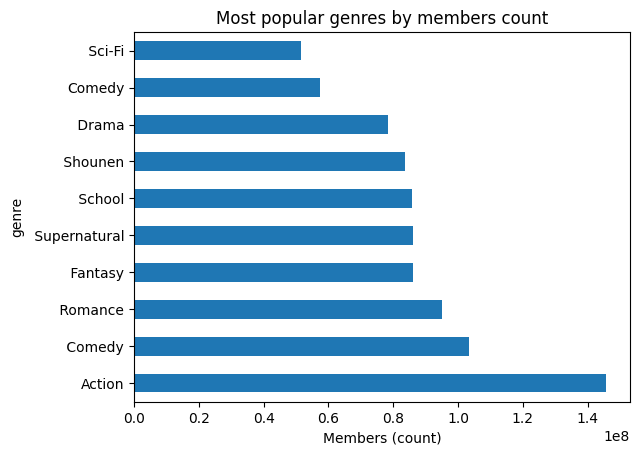

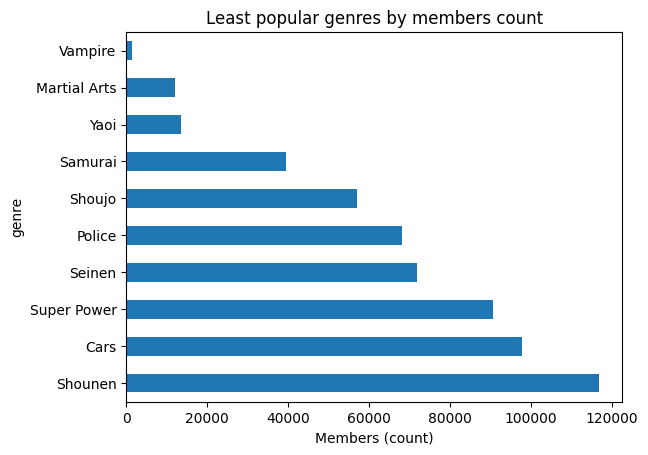

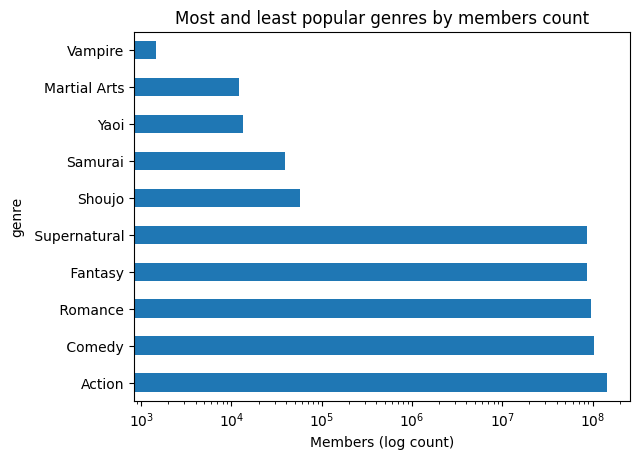

In [8]:
data = (
    df[["members", "genre"]]
    .dropna()
    .assign(genre=df["genre"].str.split(","))
    .explode(["genre"])
    .groupby("genre")
    .agg([np.sum])
    .sort_values(by=("members", "sum"), ascending=False)
)
ax = data.head(10).plot(
    kind="barh",
    y="members",
    legend=False,
    title="Most popular genres by members count",
)
ax.set_xlabel('Members (count)')

ax = data.tail(10).plot(
    kind="barh",
    y="members",
    legend=False,
    title="Least popular genres by members count",
)
ax.set_xlabel('Members (count)')

ax = data.iloc[np.r_[0:5, -5:0]].plot(
    kind="barh",
    y="members",
    legend=False,
    title="Most and least popular genres by members count",
    logx=True
)
ax.set_xlabel('Members (log count)')


An example of a misleading graph. It shows the relationship of popularity and favorites when the results were binned by score.

<Axes: xlabel='favorites', ylabel='Popularity'>

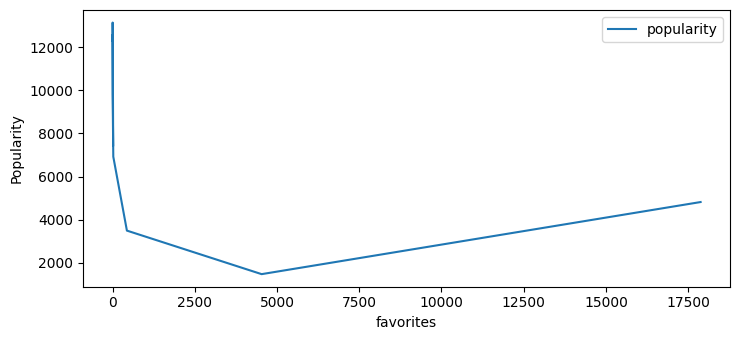

In [68]:
from matplotlib.pyplot import ylabel


df.select_dtypes(include=np.number).groupby(pd.cut(df['score'], 10)).mean().plot.line('favorites', 'popularity', ylabel='Popularity')

This is even better seen when displaying the table of the data.

In [70]:
df.select_dtypes(include=np.number).drop(columns=['anime_id']).groupby(pd.cut(df['score'], 10)).mean()

,episodes,score,scored_by,rank,popularity,members,favorites
score,,,,,,,
"(-0.01, 1.0]",0.950139,0.030471,0.418283,9467.125000,7451.759003,7056.952909,19.290859
"(1.0, 2.0]",12.692308,1.746154,573.384615,10588.076923,13135.307692,925.538462,3.307692
"(2.0, 3.0]",3.000000,2.724576,824.423729,10944.526316,12275.694915,1211.118644,5.610169
"(3.0, 4.0]",3.493766,3.647332,263.533666,10935.743003,12561.456359,553.591022,0.715711
"(4.0, 5.0]",4.436267,4.623126,221.685888,10562.665610,11729.874810,545.215478,1.540971
"(5.0, 6.0]",8.089357,5.573815,698.143031,9390.017067,9807.408661,1874.107350,3.331808
"(6.0, 7.0]",13.339265,6.510845,3876.091489,6420.132909,6923.336557,8853.418375,23.105029
"(7.0, 8.0]",14.933273,7.413819,25619.942372,2469.053401,3499.404307,50899.044889,436.964210
"(8.0, 9.0]",18.655797,8.290453,100063.217391,644.932971,1483.047101,186016.911232,4533.076087


To fix this the binned value should be used as a basis for the analysis.

<Axes: xlabel='score', ylabel='Favorites (mean count)'>

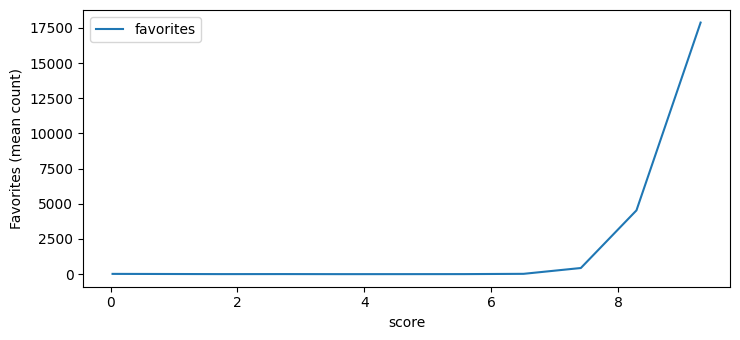

In [73]:
df.select_dtypes(include=np.number).groupby(pd.cut(df['score'], 10)).mean().plot.line('score', 'favorites', ylabel="Favorites (mean count)")

Now the relationship is much clearer and more intuitive. The higher the score the more favorited the show is. Using score as a basis let's generate some more bad graphs.

<Axes: xlabel='score'>

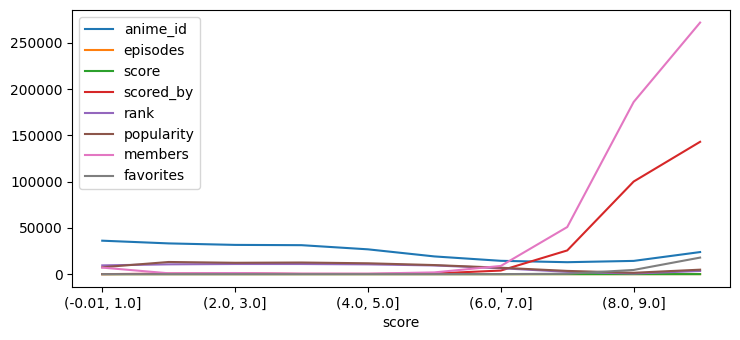

In [76]:
df.select_dtypes(include=np.number).groupby(pd.cut(df['score'], 10)).mean().plot()

Even when using score as a basis we still get a misleading graph. There are two problems here:
1. The scale of the graphs are different in orders of magnitude, thus the trends and relationships are not clear.
2. Anime id is included in the graph. Even though id has numerical values it is a categorical variable and should not be included in the graph.
3. It has inversed values like rank, where rank 1 is the best and rank 100 is the worst. This is not intuitive and should be fixed.

To fix these issues let's use normalization and remove the id.

<Axes: xlabel='score', ylabel='Normalized values'>

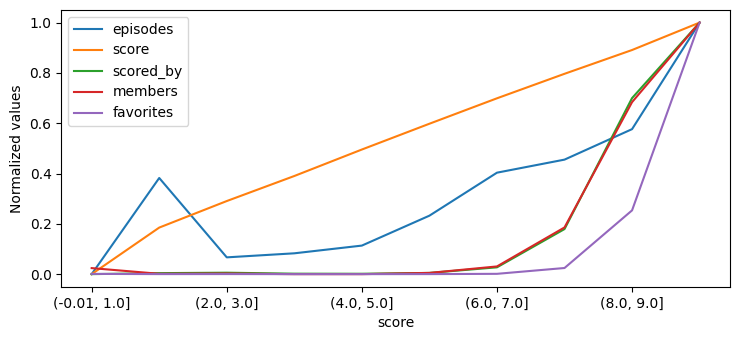

In [84]:
from sklearn import preprocessing

new_df = df.select_dtypes(include=np.number).drop(columns=['anime_id', 'rank', 'popularity']).groupby(pd.cut(df['score'], 10)).mean()
pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(new_df), columns=new_df.columns, index=new_df.index).plot(ylabel='Normalized values')

Now it's a lot clearer what is happening as the score increases.